<a href="https://colab.research.google.com/github/gpasxos/large-scale-optimization/blob/main/ch03_saddle_point_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

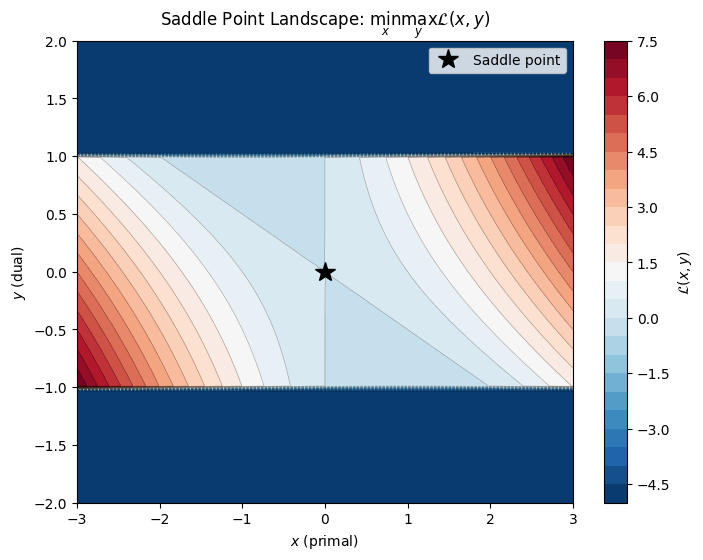

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def saddle_point_landscape(f, g_star, A, x_range, y_range, n_points=100):
    """
    Compute the saddle point function L(x,y) = f(x) + <Ax, y> - g*(y).
    For 1D visualization: x, y are scalars.
    """
    x_vals = np.linspace(x_range[0], x_range[1], n_points)
    y_vals = np.linspace(y_range[0], y_range[1], n_points)
    X, Y = np.meshgrid(x_vals, y_vals)

    L = np.zeros_like(X)
    for i in range(n_points):
        for j in range(n_points):
            x, y = X[i, j], Y[i, j]
            L[i, j] = f(x) + A * x * y - g_star(y)
    return X, Y, L

# Example: min_x {0.5*x^2 + |x|}
# Reformulate as min_x max_y {0.5*x^2 + x*y - g*(y)} where g(z) = |z|
# g*(y) = delta_{|y| <= 1}(y) = 0 if |y| <= 1, else +inf

def f(x):
    return 0.5 * x**2

def g_star(y):
    if np.abs(y) <= 1:
        return 0
    else:
        return 1e10 # Approximate infinity

A = 1.0
X, Y, L = saddle_point_landscape(f, np.vectorize(g_star), A, (-3, 3), (-2, 2))

# Clip for visualization
L = np.clip(L, -5, 10)

plt.figure(figsize=(8, 6))
plt.contourf(X, Y, L, levels=30, cmap='RdBu_r')
plt.colorbar(label='$\\mathcal{L}(x, y)$')
plt.contour(X, Y, L, levels=30, colors='k', linewidths=0.5, alpha=0.3)

# Mark saddle point (x*=0, y*=0)
plt.plot(0, 0, 'k*', markersize=15, label='Saddle point')

plt.xlabel('$x$ (primal)')
plt.ylabel('$y$ (dual)')
plt.title('Saddle Point Landscape: $\\min_x \\max_y \\mathcal{L}(x, y)$')
plt.legend()
plt.savefig('saddle_point.pdf', bbox_inches='tight')
plt.show()